<a href="https://colab.research.google.com/github/vjihye/TIL/blob/master/3_7__CNN_CIFAR10datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## • Download CIFAR10 dataset

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [6]:
train_images, test_images = train_images/255.0, test_images/255.0

## • Verify the data

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

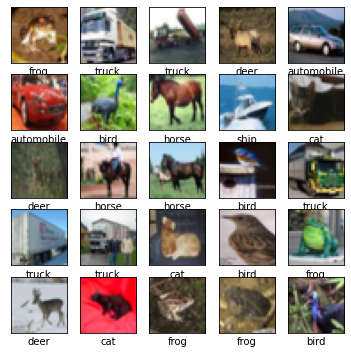

In [8]:
plt.figure(figsize=(6,6))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

##  • Create the convolutional base

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

## • Architecture of the model

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

## Add Dense Layers on top

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

## Compile and train the model

In [13]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs = 10,
                    validation_data = (test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.4901 - accuracy: 0.4598 - val_loss: 1.3028 - val_accuracy: 0.5259
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1245 - accuracy: 0.6025 - val_loss: 1.0123 - val_accuracy: 0.6434
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9709 - accuracy: 0.6627 - val_loss: 0.9885 - val_accuracy: 0.6535
Epoch 4/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.8785 - accuracy: 0.6931 - val_loss: 0.9799 - val_accuracy: 0.6641
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8029 - accuracy: 0.7207 - val_loss: 0.8744 - val_accuracy: 0.6940
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7432 - accuracy: 0.7384 - val_loss: 0.8420 - val_accuracy: 0.7141
Epoch 7/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.6893 - accuracy: 0.7580 - val_loss: 0.8668 -

## • Evaluate the model

313/313 - 4s - loss: 0.8496 - accuracy: 0.7220 - 4s/epoch - 12ms/step


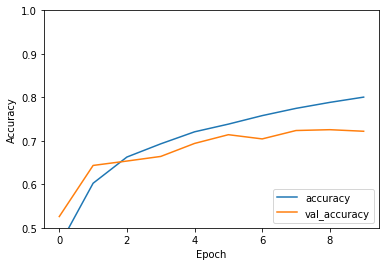

In [14]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc = 'lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose =2 )


In [17]:
print(test_loss)

0.8495660424232483


In [16]:
print(test_acc)

0.722000002861023
